In [67]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import pandas as pd
from scipy.optimize import curve_fit
import numpy.polynomial.polynomial as poly
import emcee
import corner
from scipy.optimize import minimize
from IPython.display import display, Math
import matplotlib as mpl
from multiprocessing.pool import Pool
from mcmc_functions import *
import pickle
import h5py
import glob
import os

In [68]:
# SAVE_DIR = './mcmc_fp_results/'

In [69]:
# read in the data (df created in fp jupyter notebook)
snztf18 = pd.read_csv('./forced_phot_data/snztf18_ztf_atlas_df.csv',index_col='index')
sn19rwd = pd.read_csv('./forced_phot_data/sn19rwd_ztf_atlas_df.csv',index_col='index')
sn20bio = pd.read_csv('./forced_phot_data/sn20bio_ztf_atlas_df.csv',index_col='index')
sn21aezx = pd.read_csv('./forced_phot_data/sn21aezx_ztf_atlas_df.csv',index_col='index')
sn21gno = pd.read_csv('./forced_phot_data/sn21gno_ztf_atlas_df.csv',index_col='index')
sn21heh = pd.read_csv('./forced_phot_data/sn21heh_ztf_atlas_df.csv',index_col='index')
sn21vgn = pd.read_csv('./forced_phot_data/sn21vgn_ztf_atlas_df.csv',index_col='index')
sn22hnt = pd.read_csv('./forced_phot_data/sn22hnt_ztf_atlas_df.csv',index_col='index')
sn22jpx = pd.read_csv('./forced_phot_data/sn22jpx_ztf_atlas_df.csv',index_col='index')
sn22qzr = pd.read_csv('./forced_phot_data/sn22qzr_ztf_atlas_df.csv',index_col='index')
# # added later
sn20ano = pd.read_csv('./forced_phot_data/sn20ano_ztf_atlas_df.csv', index_col='index')
sn20ikq = pd.read_csv('./forced_phot_data/sn20ikq_ztf_atlas_df.csv', index_col='index')
sn20rsc = pd.read_csv('./forced_phot_data/sn20rsc_ztf_atlas_df.csv', index_col='index')

df_list = [snztf18,sn19rwd,sn20ano,sn20bio,sn20ikq,sn20rsc,sn21aezx,sn21gno,sn21heh,sn21vgn,sn22hnt,sn22jpx,sn22qzr]
df_str_list = ['snztf18','sn19rwd','sn20ano','sn20bio','sn20ikq','sn20rsc','sn21aezx','sn21gno','sn21heh','sn21vgn','sn22hnt','sn22jpx','sn22qzr']
# df_list = [sn20ano, sn20ikq, sn20rsc]
# df_str_list = ['sn20ano', 'sn20ikq', 'sn20rsc']

sn20ano.columns

Index(['JD', 'filter', 'mag', 'ztf_mag_lower', 'ztf_mag_upper',
       'atlas_mag_err', 'data_origin'],
      dtype='object')

In [70]:
for i,df in enumerate(df_list):
    convert_ztf_err(df)

In [73]:
# cut down the data
#df_str_list = ['snztf18','sn19rwd','sn20ano','sn20bio','sn20ikq','sn20rsc','sn21aezx','sn21gno','sn21heh','sn21vgn','sn22hnt','sn22jpx','sn22qzr']
#taken from forced_phot_nb
xlims_jd_ls = [[25+2.4582e6, 55+2.4582e6], [760+2.458e6, 800+2.458e6], [869+2.458e6,910+2.458e6],[2458875.5, 2458920.5], 
               [-35+2.459e6,20+2.459e6], [78+2.459e6,110+2.459e6],[530+2.459e6, 600+2.459e6], [290+2.459e6, 320+2.459e6], 
               [2459290.5, 2459340.5], [2459430.5, 2459480.5], [2459680.5, 2459730.5], [2459706.5, 2459740.5], [799+2.459e6, 875+2.459e6]]

snztf18_cut = slice_df(snztf18,xlims_jd_ls[0])
sn19rwd_cut = slice_df(sn19rwd,xlims_jd_ls[1])
sn20ano_cut = slice_df(sn20ano,xlims_jd_ls[2])
sn20bio_cut = slice_df(sn20bio,xlims_jd_ls[3])
sn20ikq_cut = slice_df(sn20ikq,xlims_jd_ls[4])
sn20rsc_cut = slice_df(sn20rsc,xlims_jd_ls[5])
sn21aezx_cut = slice_df(sn21aezx,xlims_jd_ls[6])
sn21gno_cut = slice_df(sn21gno,xlims_jd_ls[7])
sn21heh_cut = slice_df(sn21heh,xlims_jd_ls[8])
sn21vgn_cut = slice_df(sn21vgn,xlims_jd_ls[9])
sn22hnt_cut = slice_df(sn22hnt,xlims_jd_ls[10])
sn22jpx_cut = slice_df(sn22jpx,xlims_jd_ls[11])
sn22qzr_cut = slice_df(sn22qzr,xlims_jd_ls[12])

df_cut_list = [snztf18_cut,sn19rwd_cut,sn20ano_cut,sn20bio_cut,sn20ikq_cut,sn20rsc_cut,sn21aezx_cut,sn21gno_cut,sn21heh_cut,sn21vgn_cut,sn22hnt_cut,sn22jpx_cut,sn22qzr_cut]

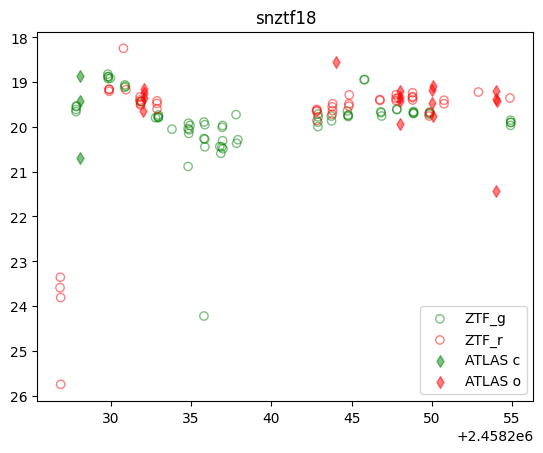

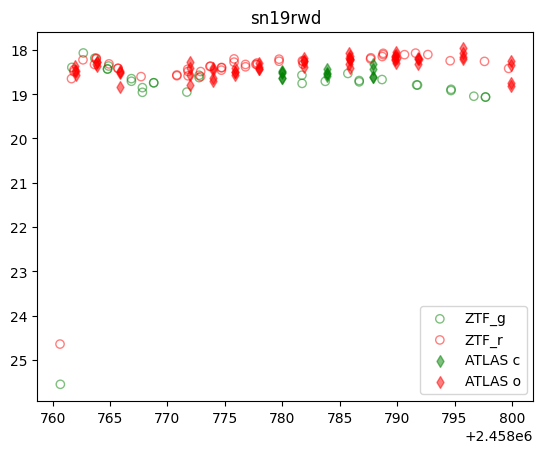

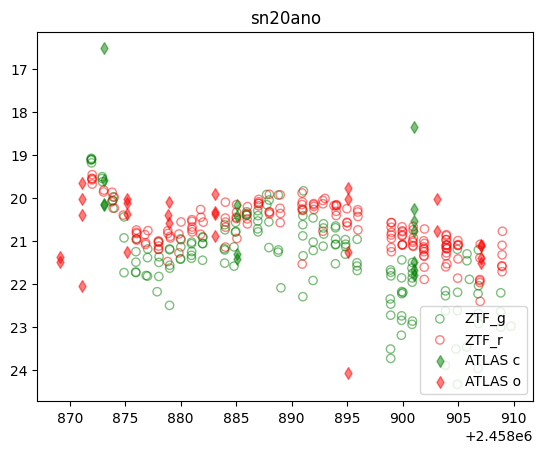

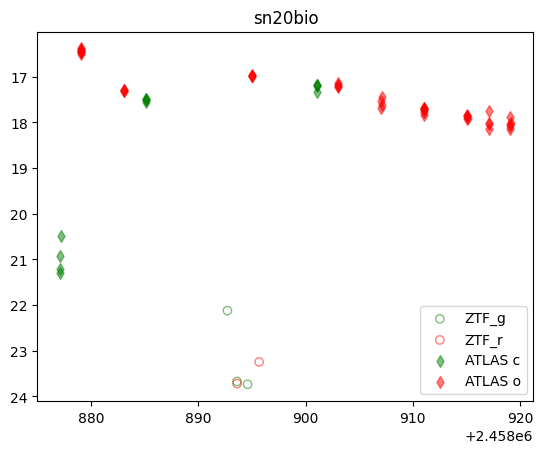

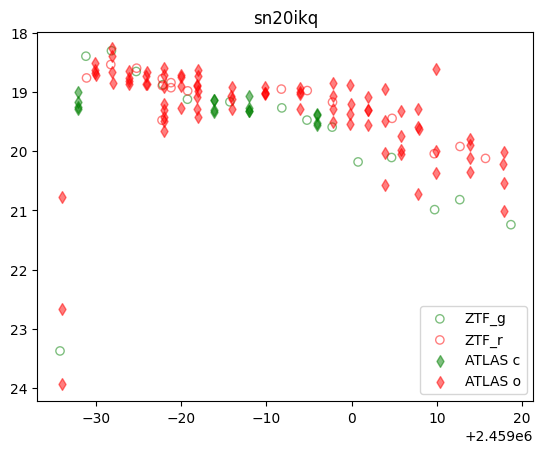

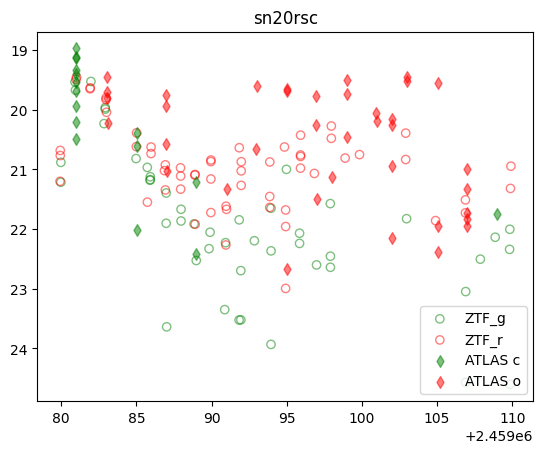

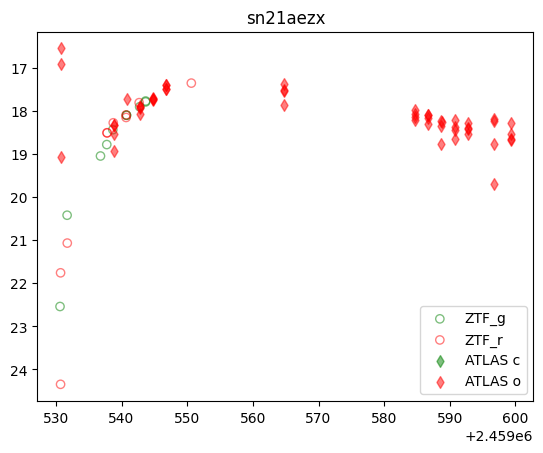

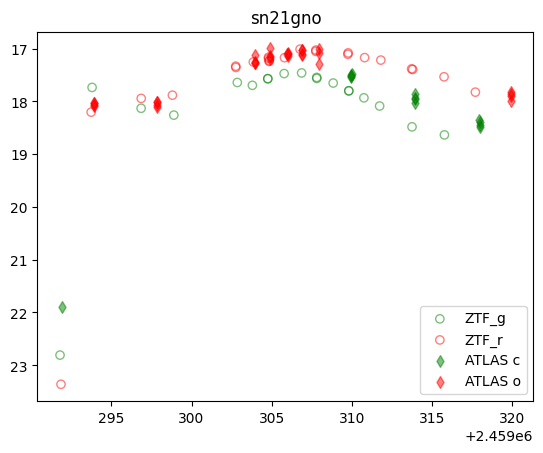

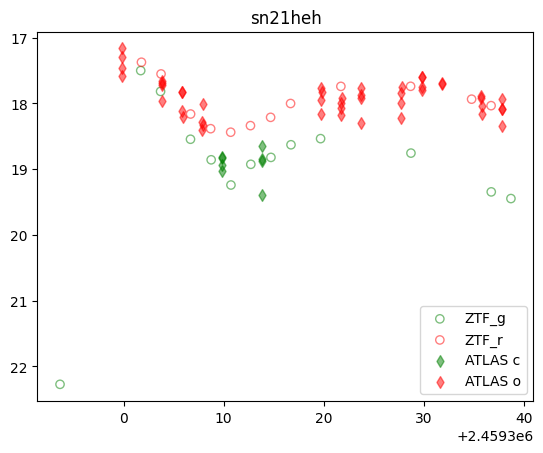

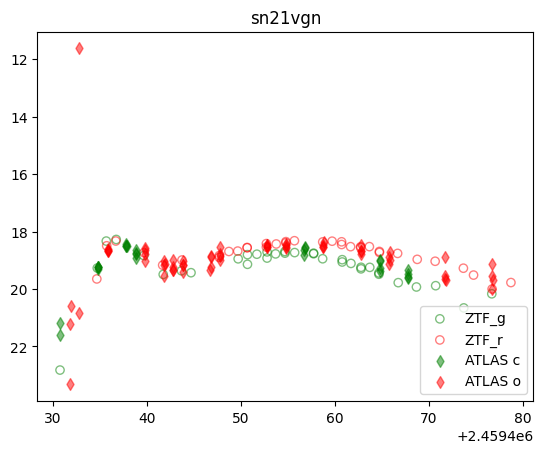

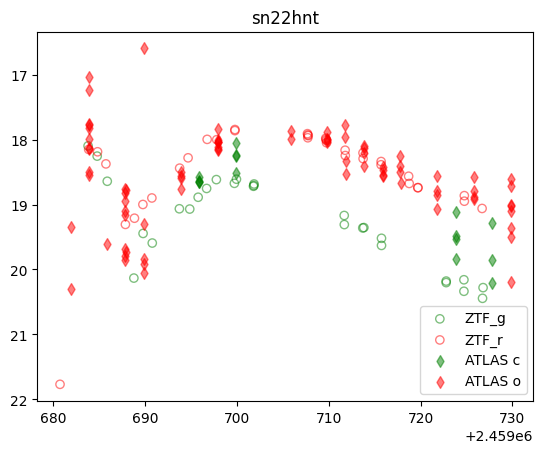

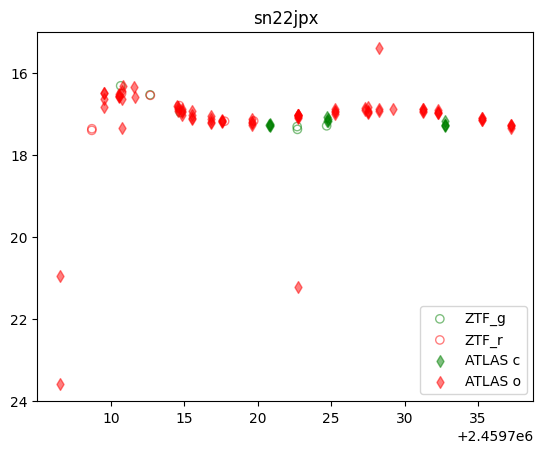

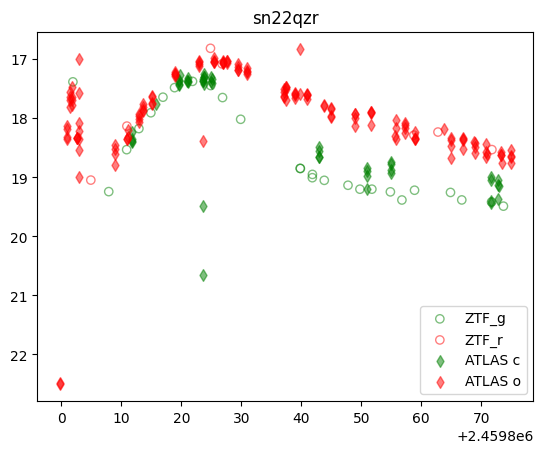

In [74]:
%matplotlib inline
for i,df in enumerate(df_cut_list):
    plt.figure()
    plt.scatter(df[df['filter']=='ZTF_g']['JD'], df[df['filter']=='ZTF_g']['mag'],edgecolors='green',facecolors='none',label='ZTF_g',alpha=0.5)
    plt.scatter(df[df['filter']=='ZTF_r']['JD'], df[df['filter']=='ZTF_r']['mag'],edgecolors='red',facecolors='none',label='ZTF_r',alpha=0.5)
    plt.scatter(df[df['filter']=='c']['JD'], df[df['filter']=='c']['mag'],color='green', marker='d',label='ATLAS c',alpha=0.5)
    plt.scatter(df[df['filter']=='o']['JD'], df[df['filter']=='o']['mag'],color='red', marker='d', label='ATLAS o',alpha=0.5)
    plt.gca().invert_yaxis()
    # plt.ylim(0,30)
    plt.legend(loc='lower right')
    plt.title(df_str_list[i])


In [77]:
# %matplotlib qt
# def find_a2(df_cut):
#     plt.figure(figsize=(10,8))
#     plt.scatter(df_cut['JD'], df_cut['mag'],s=10)
#     for i in range(len(df_cut['JD'])):
#         plt.text(np.array(df_cut['JD'])[i], np.array(df_cut['mag'])[i], str(i),fontsize=10)
#     # plt.gca().invert_yaxis()
#     plt.ylim(23,17)

# for i,df in enumerate(df_cut_list):
#     find_a2(df)
#     plt.title(df_str_list[i])

#indeces FROM ARRAY (not df index) from visual inspection, no filter differentiation
a2_inds = [52, 25, 68, 22,73,27,5, 9, 10, 116, 11, 51, 2]

In [78]:
#actually normalizing the LCs to a2

for i,df in enumerate(df_cut_list):
    norm_LC_a2(df, a2_inds[i])

In [79]:
# run subselect func
snztf18_sub,a0 = subselect(df_cut_list[0])
sn19rwd_sub,a1 = subselect(df_cut_list[1])
sn20ano_sub,a2 = subselect(df_cut_list[2])
sn20bio_sub,a3 = subselect(df_cut_list[3])
sn20ikq_sub,a4 = subselect(df_cut_list[4])
sn20rsc_sub,a5 = subselect(df_cut_list[5])
sn21aezx_sub,a6 = subselect(df_cut_list[6])
sn21gno_sub,a7 = subselect(df_cut_list[7])
sn21heh_sub,a8 = subselect(df_cut_list[8])
sn21vgn_sub,a9 = subselect(df_cut_list[9])
sn22hnt_sub,a10 = subselect(df_cut_list[10])
sn22jpx_sub,a11 = subselect(df_cut_list[11])
sn22qzr_sub,a12 = subselect(df_cut_list[12])

df_sub_ls = [snztf18_sub,sn19rwd_sub,sn20ano_sub,sn20bio_sub,sn20ikq_sub,sn20rsc_sub,sn21aezx_sub,sn21gno_sub,sn21heh_sub,sn21vgn_sub,sn22hnt_sub,sn22jpx_sub,sn22qzr_sub]
new_a2_inds = [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12]

In [80]:
#create 1 column of all errors
for i,df in enumerate(df_sub_ls):
    merge_err_cols(df)

In [81]:
sn20ano_sub.columns

Index(['JD', 'filter', 'mag', 'ztf_mag_lower', 'ztf_mag_upper',
       'atlas_mag_err', 'data_origin', 'norm_t', 'norm_m', 'max_ztf_err',
       'mag_err_all'],
      dtype='object')

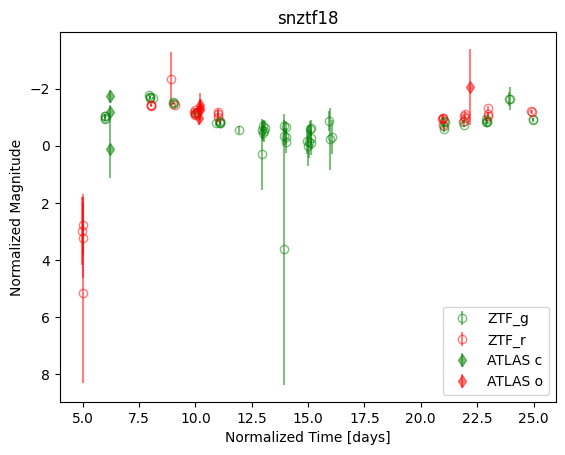

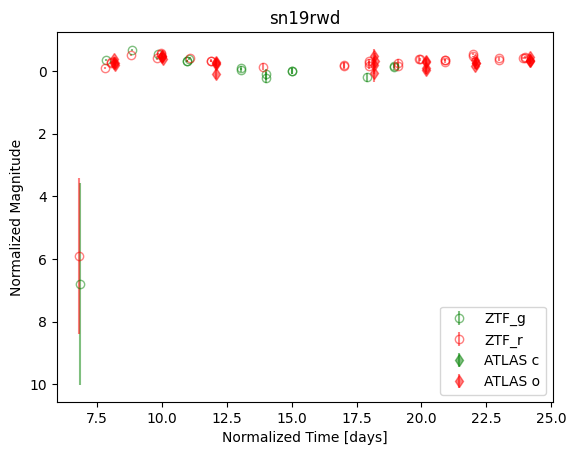

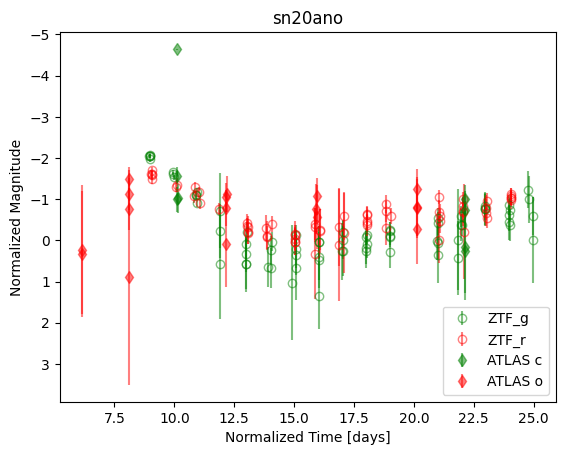

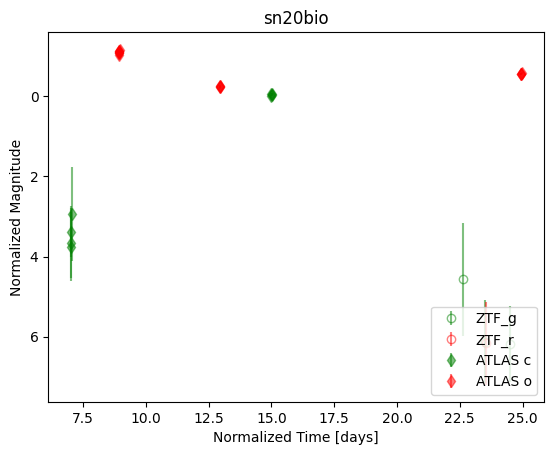

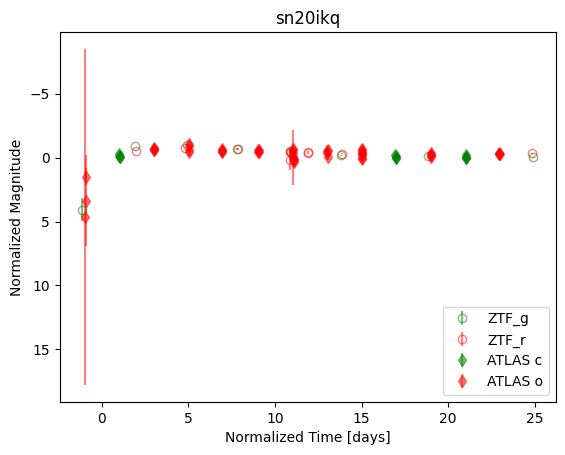

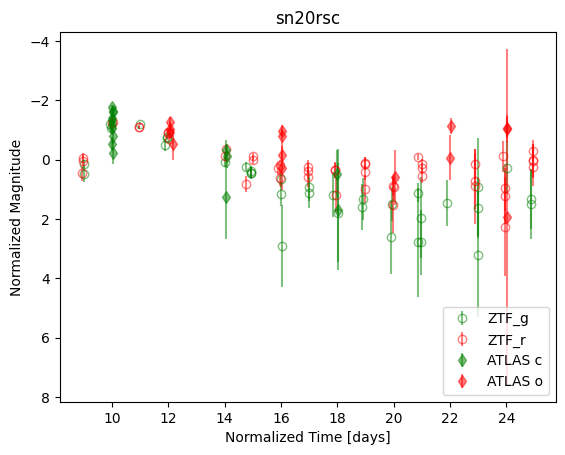

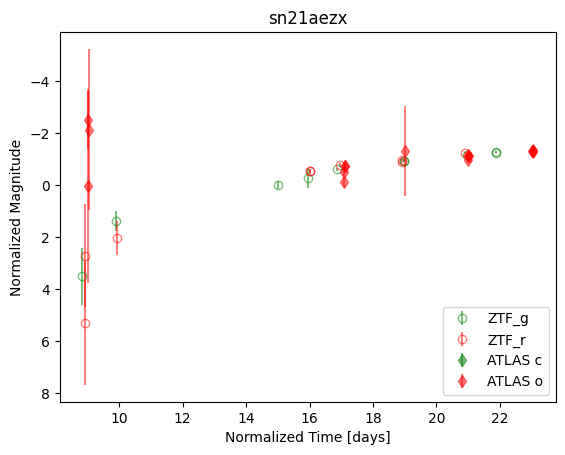

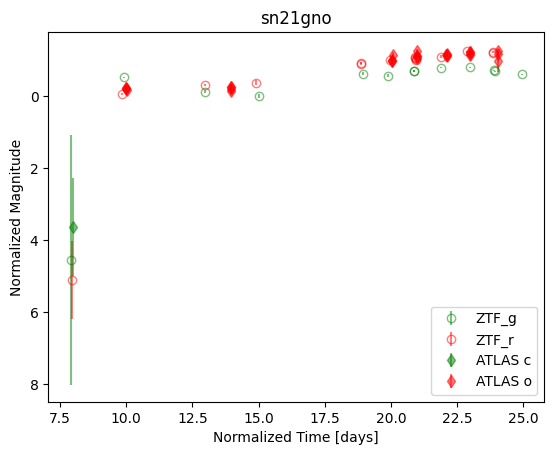

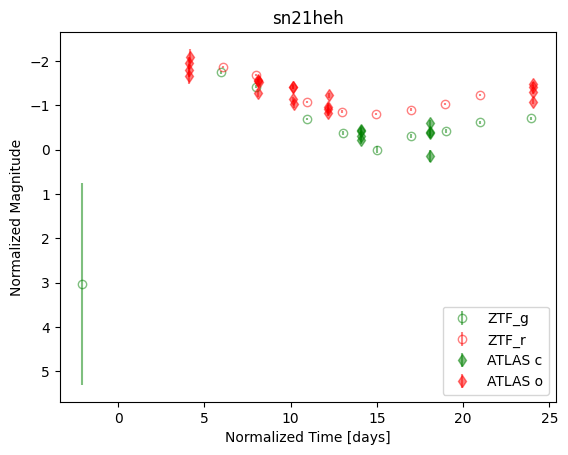

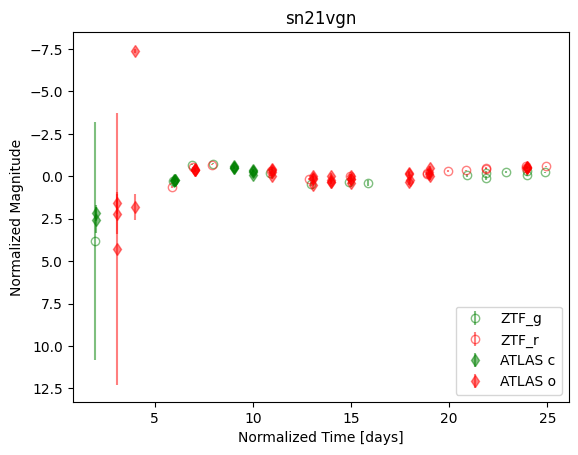

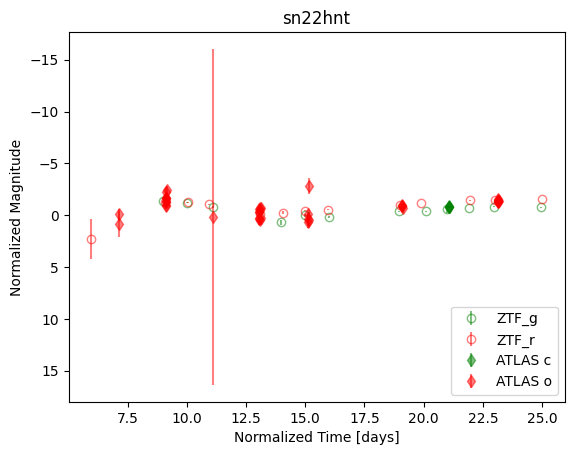

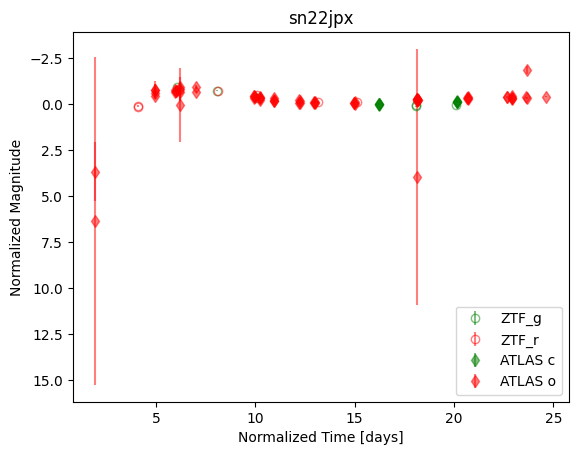

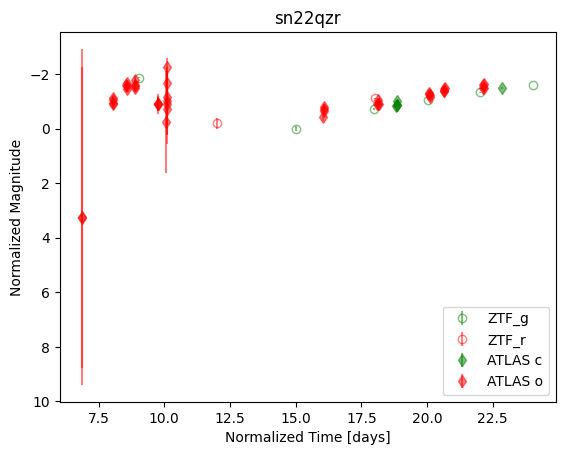

In [82]:
%matplotlib inline
for i,df in enumerate(df_sub_ls):
    plt.figure()
    plt.errorbar(df[df['filter']=='ZTF_g']['norm_t'], df[df['filter']=='ZTF_g']['norm_m'],df[df['filter']=='ZTF_g']['mag_err_all'],
                 markeredgecolor='green',markerfacecolor='none',ecolor='green',label='ZTF_g',alpha=0.5,linestyle='',marker='o')
    plt.errorbar(df[df['filter']=='ZTF_r']['norm_t'], df[df['filter']=='ZTF_r']['norm_m'],df[df['filter']=='ZTF_r']['mag_err_all'],
                 markeredgecolor='red',markerfacecolor='none',ecolor='red',label='ZTF_r',alpha=0.5,linestyle='',marker='o')
    plt.errorbar(df[df['filter']=='c']['norm_t'], df[df['filter']=='c']['norm_m'],df[df['filter']=='c']['mag_err_all'],
                 color='green', marker='d',label='ATLAS c',alpha=0.5,linestyle='')
    plt.errorbar(df[df['filter']=='o']['norm_t'], df[df['filter']=='o']['norm_m'],df[df['filter']=='o']['mag_err_all'],
                 color='red', marker='d', label='ATLAS o',alpha=0.5,linestyle='')
    plt.gca().invert_yaxis()
    plt.legend(loc='lower right')
    plt.title(df_str_list[i])
    plt.xlabel('Normalized Time [days]')
    plt.ylabel('Normalized Magnitude')


In [83]:
# def boolean list of rise1
r1_bools = [True,True,True,True,True,True,True,True,True,True,True,True,True]
r1_g_bools = [True, True, True, True, True,True, True, True, True, True, False, False, False]
r1_r_bools = [True,True,True,True,True,True,True,True,True,True,True,True,True]

r1_bool_dict = {
        "g": {"snztf18":True,
              "sn19rwd":True,
              "sn20bio":True,
              "sn21aezx":True,
              "sn21gno":True,
              "sn21heh":True,
              "sn21vgn":True,
              'sn22hnt':False,
              'sn22jpx':False,
              'sn22qzr':False,
              'sn20ano':True,
              'sn20ikq':True,
              'sn20rsc':True},
        "r": {"snztf18":True,
              "sn19rwd":True,
              "sn20bio":True,
              "sn21aezx":True,
              "sn21gno":True,
              "sn21heh":True,
              "sn21vgn":True,
              'sn22hnt':True,
              'sn22jpx':True,
              'sn22qzr':True,
              'sn20ano':True,
              'sn20ikq':True,
              'sn20rsc':True}
    }

In [84]:
# actually creating list of prior space limits
snztf18_pdict,sn19rwd_pdict,sn20ano_pdict,sn20bio_pdict,sn20ikq_pdict,sn20rsc_pdict,sn21aezx_pdict,sn21gno_pdict,sn21heh_pdict,sn21vgn_pdict,sn22hnt_pdict,sn22jpx_pdict,sn22qzr_pdict=[],[],[],[],[],[],[],[],[],[],[],[],[]
temp_pdict = [snztf18_pdict,sn19rwd_pdict,sn20ano_pdict,sn20bio_pdict,sn20ikq_pdict,sn20rsc_pdict,sn21aezx_pdict,sn21gno_pdict,sn21heh_pdict,sn21vgn_pdict,sn22hnt_pdict,sn22jpx_pdict,sn22qzr_pdict]

for i,sub in enumerate(df_sub_ls):
    # print('ON SNE', df_str_list[i])
    p = calc_prior(sub, r1_g=r1_g_bools[i], r1_r=r1_r_bools[i])
    temp_pdict[i].append(p) #applies extra 1st dimension

pdict_ls = [snztf18_pdict[0],sn19rwd_pdict[0],sn20ano_pdict[0],sn20bio_pdict[0],sn20ikq_pdict[0],sn20rsc_pdict[0],
            sn21aezx_pdict[0],sn21gno_pdict[0],sn21heh_pdict[0],sn21vgn_pdict[0],sn22hnt_pdict[0],sn22jpx_pdict[0],sn22qzr_pdict[0]]

12.959606499876827 16.5
11.024212900083512 20.957604099996388
13.057245300151408 17.885092600248754
12.083327900152653 17.99365740036592
12.97346070036292 17.99998850002885
12.1571254003793 17.063321799971163
13.5 16.5
12.943601000122726 23.526212099939585
13.5 16.980994999874383
13.027420000173151 16.5
13.5 17.99203749978915
12.00540510006249 17.936087999958545
9.916886599734426 16.878692199941725
9.94143519969657 17.118372399825603
12.959537100046873 18.959502399899065
12.964421299751848 18.86081019975245
13.024780100211501 16.984375
12.151536900084466 16.949224499985576
12.935359899885952 16.5
12.87760529993102 17.982155999634415
13.5 16.5
13.035427199676633 16.5
10.142385199666023 16.5
12.217712000012398 16.5
9.024236100260168 17.986064800061285
12.010590299963951 16.5


In [85]:
# run p0_calc
snztf18_p0,sn19rwd_p0,sn20ano_p0,sn20bio_p0,sn20ikq_p0,sn20rsc_p0,sn21aezx_p0,sn21gno_p0,sn21heh_p0,sn21vgn_p0,sn22hnt_p0,sn22jpx_p0,sn22qzr_p0=[],[],[],[],[],[],[],[],[],[],[],[],[]
temp_p0s = [snztf18_p0,sn19rwd_p0,sn20ano_p0,sn20bio_p0,sn20ikq_p0,sn20rsc_p0,sn21aezx_p0,sn21gno_p0,sn21heh_p0,sn21vgn_p0,sn22hnt_p0,sn22jpx_p0,sn22qzr_p0]

for i,pdict in enumerate(pdict_ls):
    p = p0_calc(pdict)
    temp_p0s[i].append(p) #applies extra 1st dimension

p0s = [snztf18_p0[0],sn19rwd_p0[0],sn20ano_p0[0],sn20bio_p0[0],sn20ikq_p0[0],sn20rsc_p0[0],sn21aezx_p0[0],sn21gno_p0[0],sn21heh_p0[0],sn21vgn_p0[0],sn22hnt_p0[0],sn22jpx_p0[0],sn22qzr_p0[0]]

[[-1.0, 0.25, -0.125, -2.75, 9.467916649766266, 14.729803249938414, -2], [-1.0, 0.2, -0.1, -2.5, 8.002962899859995, 15.99090850003995, -2]]
[[-1.0, 0.25, -0.125, -2.75, 9.963003400247544, 15.47116895020008, -2], [-1.0, 0.2, -0.1, -2.5, 9.461687100119889, 15.038492650259286, -2]]
[[-1.0, 0.25, -0.125, -2.75, 10.957899350207299, 15.486724600195885, -2], [-1.0, 0.2, -0.1, -2.5, 9.156952400226146, 14.610223600175232, -2]]
[[-1.0, 0.25, -0.125, -2.75, 10.257255000062287, 15.0, -2], [-1.0, 0.2, -0.1, -2.5, 10.937342500081286, 18.234906550031155, -2]]
[[-1.0, 0.25, -0.125, -2.75, 6.183538250159472, 15.240497499937192, -2], [-1.0, 0.2, -0.1, -2.5, 6.041346500162035, 14.763710000086576, -2]]
[[-1.0, 0.25, -0.125, -2.75, 11.250162049895152, 15.746018749894574, -2], [-1.0, 0.2, -0.1, -2.5, 10.474820600124076, 14.970746550010517, -2]]
[[-1.0, 0.25, -0.125, -2.75, 9.376718799816445, 13.397789399838075, -2], [-1.0, 0.2, -0.1, -2.5, 9.430856499820948, 13.529903799761087, -2]]
[[-1.0, 0.25, -0.125, -2

In [86]:
#sep out initial guesses for multiproc
g_p0 = [p0s[i][0] for i in range(len(p0s))]
r_p0 = [p0s[i][1] for i in range(len(p0s))]

In [87]:
#write out the subselected dataframes for GP stuffs (?)
for i,df in enumerate(df_sub_ls):
    df.to_csv(SAVE_DIR+'subselected_dfs/'+df_str_list[i]+'.csv',index=False)

In [18]:
##############################################
#
#    RUN ALL MCMC AND PLOT RESULTS
#
###############################################

In [ ]:
# create method to run subset of sample

df_strs = [df_str_list[2],df_str_list[4], df_str_list[5]]
df_subs = [df_sub_ls[2], df_sub_ls[4], df_sub_ls[5]]
r1_bools = [True,True,True]
gp0s = [g_p0[2],g_p0[4], g_p0[5]]
pdicts = [pdict_ls[2], pdict_ls[4], pdict_ls[5]]

pool=Pool(3)
inputs = zip(df_strs, df_subs, ['g']*len(df_subs), r1_bools, gp0s, pdicts)
all_fits_g = []

with open(SAVE_DIR+'bestfits_g_may1.txt', 'a') as savefile:
    for fit in pool.map(mp_fit_sne, inputs):
        np.savetxt(savefile,fit)
        all_fits_g.append(fit)
pool.close()
savefile.close()

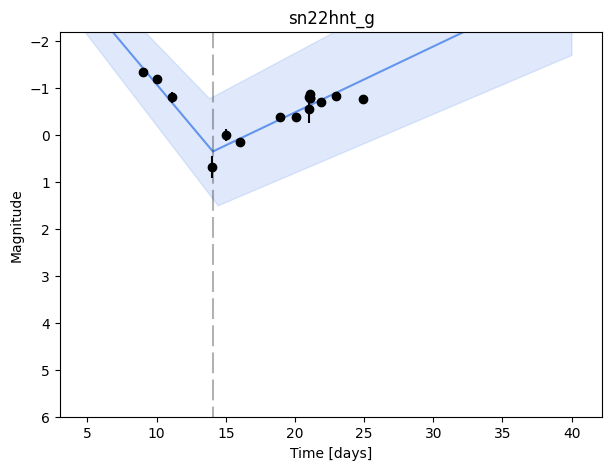

<Figure size 900x700 with 0 Axes>

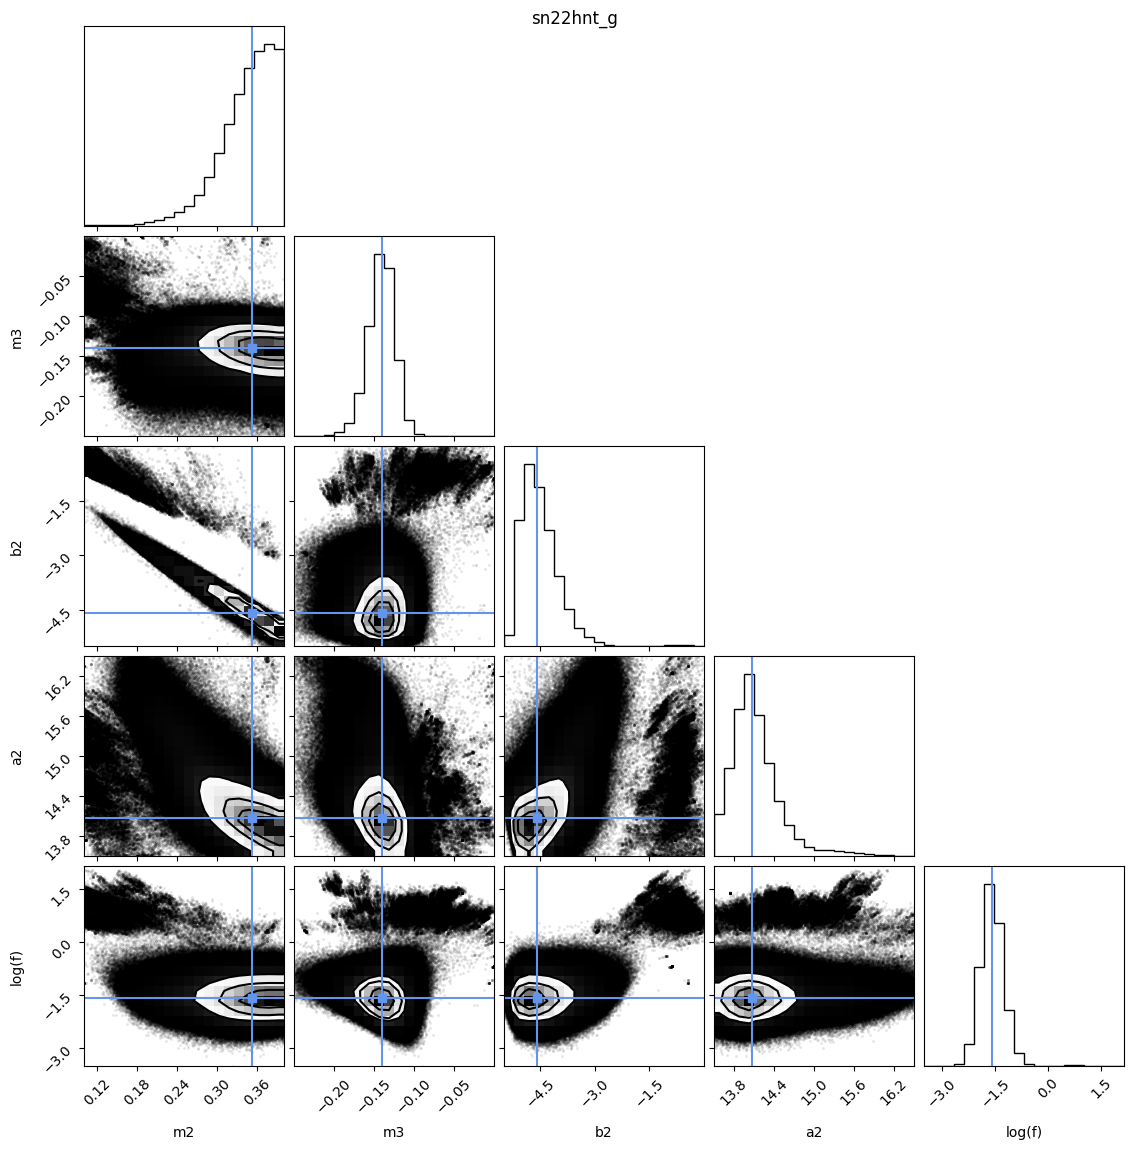

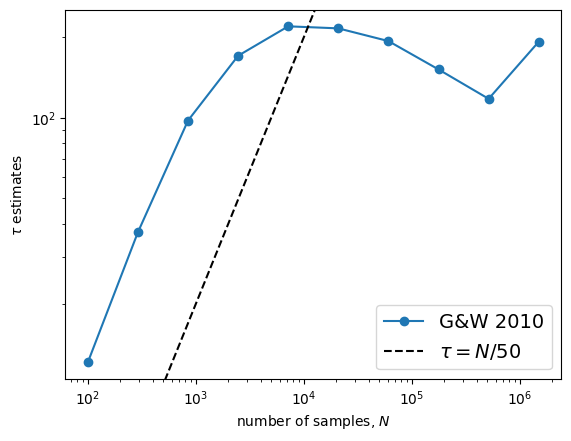

In [18]:
# DONT RERUN

# #just 22hnt_g band mcmc run, index 7
# # hnt_inputs = zip('22hnt_g',df_sub_ls[7],'g',r1_g_bools[7],g_p0[7],pdict_ls[7])

# g_df = df_sub_ls[7][(df_sub_ls[7]['filter']=='ZTF_g') | (df_sub_ls[7]['filter']=='c')]
# x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
# save_name = 'sn22hnt_g'

# #run mcmc and save bestfit results, chains.h5
# fit, mc = mcmc_fit(x, y, yerr, pdict_ls[7], p0=g_p0[7], r1=r1_g_bools[7], band='g', sn_name=save_name)

# #plot mcmc results
# plot_mcmc_results(x, y, yerr, fit, mc, r1=r1_g_bools[7], sn_band=save_name, save=True)

# #calc and plot autocorr values
# do_gw_autocorr_and_plot(mc, save_name)

In [38]:
# DONT RERUN

# g band multiproc

pool=Pool()
inputs = zip(df_str_list, df_sub_ls, ['g']*len(df_sub_ls), r1_g_bools, g_p0, pdict_ls)
all_fits_g = []

with open(SAVE_DIR+'bestfits_g_april22.txt', 'a') as savefile:
    for fit in pool.map(mp_fit_sne, inputs):
        np.savetxt(savefile,fit)
        all_fits_g.append(fit)
pool.close()
savefile.close()

ON SN : ON SN :  sn20ikq
 sn20rsc
ON SN :  sn20ano


In [39]:
# DONT RERUN

# r band multiproc

pool=Pool(processes=5)
inputs = zip(df_str_list, df_sub_ls, ['r']*len(df_sub_ls), r1_r_bools, r_p0, pdict_ls)
all_fits_r = []

with open(SAVE_DIR+'bestfits_r_april22.txt', 'a') as savefile:
    for fit in pool.map(mp_fit_sne, inputs):
        np.savetxt(savefile,fit)
        all_fits_r.append(fit)
pool.close()

ON SN :  sn20ikq
ON SN :  sn20ano
ON SN :  sn20rsc


In [66]:
# RUN IF WANT TO CONVERT H5 CHAIN FILES TO FLAT CHAINS LOCALLY

# PATH_TO_G_CHAINS = '../ztf_IIb_data/mcmc_fp_results/mcmc_chains/g_chains/'
# PATH_TO_R_CHAINS = '../ztf_IIb_data/mcmc_fp_results/mcmc_chains/r_chains/'
# h5_2_txt(PATH_TO_R_CHAINS)

Working on sn21aezx
Working on snztf18
Working on sn21heh
Working on sn22qzr
Working on sn20bio


In [66]:
# if code crashes, reload the chains here to find bestfit
g_chains = []
r_chains = []
for i in range(len(df_str_list)):
    gf = SAVE_DIR+df_str_list[i]+'_g_flatchains.txt'
    rf = SAVE_DIR+df_str_list[i]+'_r_flatchains.txt'
    g_chains.append(gf)
    r_chains.append(rf)

def bestfit_recovery(filename, sub_df, band='', r1_bool=True, sn_id_band='test_g', replot=False):
    flat_samples = np.loadtxt(filename)
    if r1_bool:
        ndim = 7
    if not r1_bool:
        ndim = 5

    mcmc_results = []
    #retrieve the 16th/50th/84th percentile for each param and the lower/upper bounds on each
    for i in range(ndim):
        mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        arr = [mcmc[1], q[0], q[1]]
        mcmc_results.append(arr)

    # making fit/autocorr/corner plots
    if band == 'g':
        g_df = sub_df[(sub_df['filter']=='ZTF_g') | (sub_df['filter']=='c')]
        x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
    if band == 'r':
        r_df = sub_df[(sub_df['filter']=='ZTF_r') | (sub_df['filter']=='o')]
        x,y,yerr = np.array(r_df['norm_t']),np.array(r_df['norm_m']),np.array(r_df['mag_err_all'])
    if replot:
        plot_mcmc_results(x, y, yerr, mcmc_results, flat_samples, r1=r1_bool, sn_band=sn_id_band, save=True)
        do_gw_autocorr_and_plot(filename, sn_id_band)

    return mcmc_results#,flat_samples

In [67]:
all_fits_g = []
for i,file in enumerate(g_chains):
    fit = bestfit_recovery(file, df_sub_ls[i], band='g', r1_bool=r1_bool_dict['g'][df_str_list[i]],sn_id_band=df_str_list[i]+'_g')
    all_fits_g.append(fit)

In [68]:
all_fits_r = []
for i,file in enumerate(r_chains):
    fit = bestfit_recovery(file, df_sub_ls[i], band='r', r1_bool=r1_bool_dict['r'][df_str_list[i]],sn_id_band=df_str_list[i]+'_r')
    all_fits_r.append(fit)

In [101]:
# colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
colors = ['#8dd3c7','#ff7f00','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#6a3d9a','#bc80bd','#ccebc5','#ffed6f','#1f78b4']

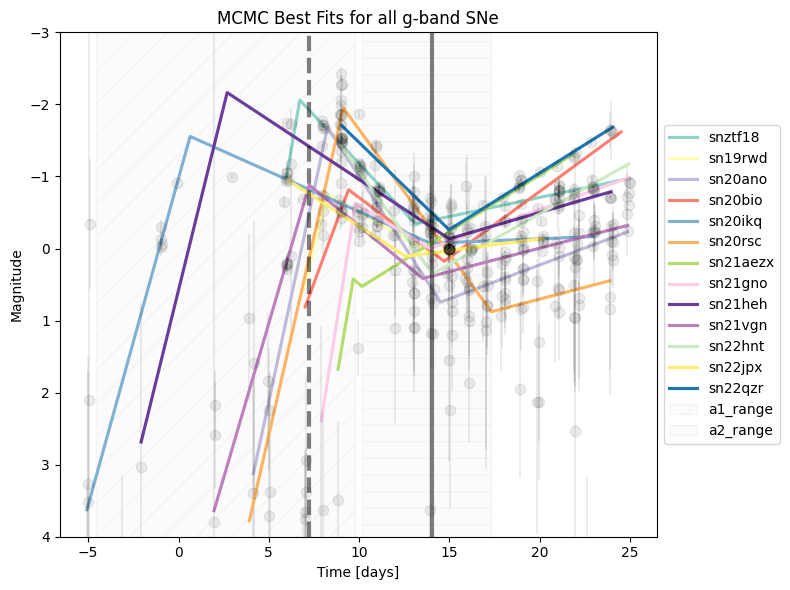

In [81]:
a1s,a2s = [],[]
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    g_df = df[(df['filter']=='ZTF_g') | (df['filter']=='c')]
    x_plt = np.arange(min(g_df['norm_t']),max(g_df['norm_t']),0.01)

    best = np.array(all_fits_g[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_g[i]).T[0] - np.array(all_fits_g[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_g[i]).T[0] + np.array(all_fits_g[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_g_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=1.0, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='gray', alpha=0.05)
    
    # #plotting ztf/atlas data
    x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
    plt.errorbar(x, y, yerr, linestyle='', marker='.', color='black', alpha=0.075, label='data', markersize=15) #ztf errors

min_a1, med_a1, max_a1 = min(a1s), np.median(a1s), max(a1s)
min_a2, med_a2, max_a2 = min(a2s), np.median(a2s), max(a2s)
plt.axvspan(min_a1, max_a1, alpha=0.03, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
plt.axvspan(min_a2, max_a2, alpha=0.03, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(med_a1,alpha=0.5, color='black', linestyle='dashed', linewidth=3, label='best_a1', zorder=10)
plt.axvline(med_a2,alpha=0.5, color='black', linestyle='solid', linewidth=3, label='best_a2', zorder=10)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Best Fits for all g-band SNe')
plt.ylim(4,-3)
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_g_a12err_april23.png')
# plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_g_errband_april23.png')

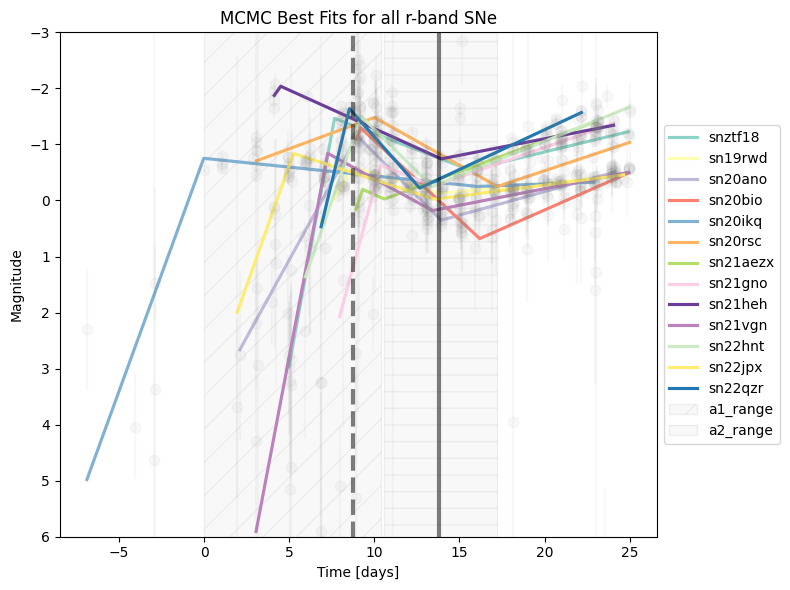

In [84]:
# x_plt = np.arange(1,40,0.01)
# colors=['red', 'darkorange', 'gold', 'green', 'blue', 'purple']
# ls = ['solid', 'dotted', 'dashed', 'dashdot', (5, (10, 3)), (0, (3, 5, 1, 5))]

a1s,a2s = [],[]
plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    r_df = df[(df['filter']=='ZTF_r') | (df['filter']=='o')]
    x_plt = np.arange(min(r_df['norm_t']),max(r_df['norm_t']),0.01)

    best = np.array(all_fits_r[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_r[i]).T[0] - np.array(all_fits_r[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_r[i]).T[0] + np.array(all_fits_r[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_r_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=1.0, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='lightgray', alpha=0.2)

    #plotting ztf data
    x,y,yerr = np.array(r_df['norm_t']),np.array(r_df['norm_m']),np.array(r_df['mag_err_all'])
    plt.errorbar(x, y, yerr, linestyle='', marker='.', color='gray', alpha=0.05, label='data', markersize=15) #ztf errors, 

min_a1, med_a1, max_a1 = min(a1s), np.median(a1s), max(a1s)
min_a2, med_a2, max_a2 = min(a2s), np.median(a2s), max(a2s)
plt.axvspan(min_a1, max_a1, alpha=0.05, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
plt.axvspan(min_a2, max_a2, alpha=0.05, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(med_a1,alpha=0.5, color='black', linestyle='dashed', linewidth=3, label='best_a1', zorder=10)
plt.axvline(med_a2,alpha=0.5, color='black', linestyle='solid', linewidth=3, label='best_a2', zorder=10)

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Best Fits for all r-band SNe')
plt.ylim(6,-3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_r_a12err_april23.png')
# plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_r_errband_april23.png')

In [85]:
#the next two loops separate out the indivudal param values and append to list to do stats on them
best_fits_g,best_fits_r = [],[]
low_err_g, upp_err_g =[],[]
low_err_r, upp_err_r =[],[]
for i in range(len(all_fits_r)):
    #g band
    bestg = np.array(all_fits_g[i]).T[0]  #bestfit (50% ptile) values
    lowg = np.array(all_fits_g[i]).T[1]   #lower bound, 16% ptile
    highg =  np.array(all_fits_g[i]).T[2] #upper bound, 84% ptile
    best_fits_g.append(bestg)
    low_err_g.append(lowg)
    upp_err_g.append(highg)

    #r band
    bestr = np.array(all_fits_r[i]).T[0]  #bestfit (50% ptile) values
    lowr = np.array(all_fits_r[i]).T[1]   #lower bound, 16% ptile
    highr =  np.array(all_fits_r[i]).T[2] #upper bound, 84% ptile
    best_fits_r.append(bestr)
    low_err_r.append(lowr)
    upp_err_r.append(highr)

# formatting and saving best fits values in g and r
best_fits_g_same_len = []
for i,arr in enumerate(best_fits_g):
    if len(arr) == 5:
        arr = np.insert(arr, [0,3], np.nan)
    best_fits_g_same_len.append(arr)

best_fits_r_same_len = []
for i,arr in enumerate(best_fits_r):
    if len(arr) == 5:
        arr = np.insert(arr, [0,3], np.nan)
    best_fits_r_same_len.append(arr)

#saving to df
best_fits_cols_g = ['m1_g', 'm2_g', 'm3_g', 'b2_g', 'a1_g', 'a2_g', 'log_f_g']
best_fits_cols_r = ['m1_r', 'm2_r', 'm3_r', 'b2_r', 'a1_r', 'a2_r', 'log_f_r']
bestfit_df = pd.DataFrame(columns=best_fits_cols_g, data=best_fits_g_same_len)
bestfit_r_df = pd.DataFrame(columns=best_fits_cols_r, data=best_fits_r_same_len)
bestfit_df.insert(0,'SN_ID', df_str_list)
bestfit_df = pd.concat([bestfit_df,bestfit_r_df], axis=1)
bestfit_df.to_csv(SAVE_DIR+'/mcmc_bestfit_vals_april23.csv')
bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,m3_r,b2_r,a1_r,a2_r,log_f_r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,-0.073302,-2.350598,7.663041,15.613060,-3.564006
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,-0.029224,-1.386172,8.728792,13.820153,-1.902896
2,sn20ano,-1.171750,0.387251,-0.094119,-4.874802,8.248109,14.510561,-0.368900,-0.552538,0.306017,-0.084070,-3.906196,9.004848,13.918889,-3.298512
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,-0.133987,-3.897599,9.193014,16.188675,-3.466265
4,sn20ikq,-0.906914,0.111643,-0.010197,-1.627364,0.642476,13.923874,-0.746472,-0.835748,0.031369,-0.011279,-0.751656,-0.022000,16.018235,-1.441795
5,sn20rsc,-1.103691,0.345480,-0.065547,-5.105449,9.117605,17.318488,-1.658644,-0.111676,0.170915,-0.101196,-3.192888,10.011612,17.224436,-0.607268
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,-0.111153,-1.473953,9.312693,10.577875,-2.805892
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,-0.105575,-1.871648,10.381562,13.481051,-2.602094
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,-0.059142,-2.657557,4.501014,13.922081,-2.373261
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,-0.059288,-2.048997,7.264507,13.407664,-0.335258


In [86]:
# extra quantities we may want

#same sn, same lc, same filters, diff params
bestfit_df['a2g-a1g'] = bestfit_df['a2_g'] - bestfit_df['a1_g']
bestfit_df['a2r-a1r'] = bestfit_df['a2_r'] - bestfit_df['a1_r']
#same sn, diff lc, diff filters, same params
bestfit_df['a1g-a1r'] = bestfit_df['a1_g'] - bestfit_df['a1_r']
bestfit_df['a2g-a2r'] = bestfit_df['a2_g'] - bestfit_df['a2_r']
bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,m3_r,b2_r,a1_r,a2_r,log_f_r,a2g-a1g,a2r-a1r,a1g-a1r,a2g-a2r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,-0.073302,-2.350598,7.663041,15.613060,-3.564006,6.393828,7.950019,-0.948900,-2.505090
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,-0.029224,-1.386172,8.728792,13.820153,-1.902896,5.902160,5.091361,-0.466980,0.343819
2,sn20ano,-1.171750,0.387251,-0.094119,-4.874802,8.248109,14.510561,-0.368900,-0.552538,0.306017,-0.084070,-3.906196,9.004848,13.918889,-3.298512,6.262452,4.914042,-0.756738,0.591672
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,-0.133987,-3.897599,9.193014,16.188675,-3.466265,5.307184,6.995661,0.217111,-1.471366
4,sn20ikq,-0.906914,0.111643,-0.010197,-1.627364,0.642476,13.923874,-0.746472,-0.835748,0.031369,-0.011279,-0.751656,-0.022000,16.018235,-1.441795,13.281398,16.040235,0.664476,-2.094360
5,sn20rsc,-1.103691,0.345480,-0.065547,-5.105449,9.117605,17.318488,-1.658644,-0.111676,0.170915,-0.101196,-3.192888,10.011612,17.224436,-0.607268,8.200883,7.212825,-0.894007,0.094052
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,-0.111153,-1.473953,9.312693,10.577875,-2.805892,0.487675,1.265183,0.358611,-0.418897
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,-0.105575,-1.871648,10.381562,13.481051,-2.602094,4.131018,3.099489,-0.583495,0.448034
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,-0.059142,-2.657557,4.501014,13.922081,-2.373261,12.291356,9.421067,-1.806982,1.063307
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,-0.059288,-2.048997,7.264507,13.407664,-0.335258,6.290702,6.143158,-0.027992,0.119553


In [87]:
#finding the model mag at bestfit: a1/a2 for each band
#r1_g_bool, r1_r_bool
m_a2g_a1g_ls, m_a2r_a1r_ls, m_a1g_a1r_ls, m_a2g_a2r_ls = [],[],[],[]
for i in range(len(bestfit_df['SN_ID'])):
    #gband
    sn_g = bestfit_df.loc[:,bestfit_df.columns.str[-2:]=='_g'].loc[i]
    sn_g = sn_g.loc[sn_g.notna()]
    a1_g, a2_g = bestfit_df['a1_g'].loc[i], bestfit_df['a2_g'].loc[i]
    a1crit_g = x_plt == x_plt.flat[np.abs(x_plt - a1_g).argmin()]
    a2crit_g = x_plt == x_plt.flat[np.abs(x_plt - a2_g).argmin()]

    mags_g = np.array([model(sn_g, v, r1=r1_g_bools[i]) for v in x_plt])
    a1_gmag, a2_gmag = mags_g[a1crit_g], mags_g[a2crit_g]

    #rband
    sn_r = bestfit_df.loc[:,bestfit_df.columns.str[-2:]=='_r'].loc[i]
    sn_r = sn_r.loc[sn_r.notna()]
    a1_r, a2_r = bestfit_df['a1_r'].loc[i], bestfit_df['a2_r'].loc[i]
    a1crit_r = x_plt == x_plt.flat[np.abs(x_plt - a1_r).argmin()]
    a2crit_r = x_plt == x_plt.flat[np.abs(x_plt - a2_r).argmin()]
    
    mags_r = np.array([model(sn_r, v, r1=r1_r_bools[i]) for v in x_plt])
    a1_rmag, a2_rmag = mags_r[a1crit_r], mags_g[a2crit_r]

    #calcing quants
    m_a2g_a1g = a2_gmag - a1_gmag
    m_a2r_a1r = a2_rmag - a1_rmag
    m_a1g_a1r = a1_gmag - a1_rmag
    m_a2g_a2r = a2_gmag - a2_rmag

    #appending
    m_a2g_a1g_ls.append(m_a2g_a1g[0])
    m_a2r_a1r_ls.append(m_a2r_a1r[0])
    m_a1g_a1r_ls.append(m_a1g_a1r[0])
    m_a2g_a2r_ls.append(m_a2g_a2r[0])

bestfit_df['mag_a2g-a1g'] = m_a2g_a1g_ls
bestfit_df['mag_a2r-a1r'] = m_a2r_a1r_ls
bestfit_df['mag_a1g-a1r'] = m_a1g_a1r_ls
bestfit_df['mag_a2g-a2r'] = m_a2g_a2r_ls
bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,...,a2_r,log_f_r,a2g-a1g,a2r-a1r,a1g-a1r,a2g-a2r,mag_a2g-a1g,mag_a2r-a1r,mag_a1g-a1r,mag_a2g-a2r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,...,15.613060,-3.564006,6.393828,7.950019,-0.948900,-2.505090,1.673094,0.987252,-0.554037,0.131805
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,...,13.820153,-1.902896,5.902160,5.091361,-0.466980,0.343819,0.838702,0.632992,-0.157516,0.048194
2,sn20ano,-1.171750,0.387251,-0.094119,-4.874802,8.248109,14.510561,-0.368900,-0.552538,0.306017,...,13.918889,-3.298512,6.262452,4.914042,-0.756738,0.591672,2.420796,1.664194,-0.526261,0.230341
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,...,16.188675,-3.466265,5.307184,6.995661,0.217111,-1.471366,0.992863,1.205446,0.481181,0.268598
4,sn20ikq,-0.906914,0.111643,-0.010197,-1.627364,0.642476,13.923874,-0.746472,-0.835748,0.031369,...,16.018235,-1.441795,13.281398,16.040235,0.664476,-2.094360,0.786980,0.441827,-0.323841,0.021312
5,sn20rsc,-1.103691,0.345480,-0.065547,-5.105449,9.117605,17.318488,-1.658644,-0.111676,0.170915,...,17.224436,-0.607268,8.200883,7.212825,-0.894007,0.094052,2.828777,2.326572,-0.471112,0.031093
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,...,10.577875,-2.805892,0.487675,1.265183,0.358611,-0.418897,0.103491,0.659801,0.620718,0.064407
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,...,13.481051,-2.602094,4.131018,3.099489,-0.583495,0.448034,0.621811,0.561586,0.006639,0.066864
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,...,13.922081,-2.373261,12.291356,9.421067,-1.806982,1.063307,1.339614,1.402314,0.237792,0.175091
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,...,13.407664,-0.335258,6.290702,6.143158,-0.027992,0.119553,1.294959,1.231718,-0.038500,0.024741


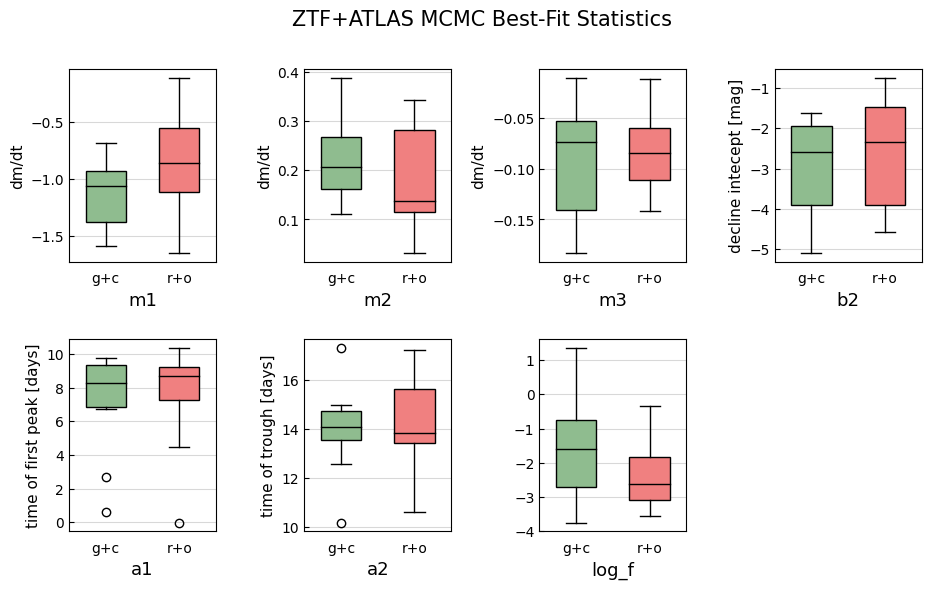

In [88]:
#making box and whisker plots and histograms
xlabels = ['m1', 'm2', 'm3', 'b2', 'a1', 'a2', 'log_f']
ylabels= ['dm/dt','dm/dt','dm/dt','decline intecept [mag]','time of first peak [days]', 'time of trough [days]']
labels = ['g+c','r+o']
boxprops = dict(linewidth=1.0, color='black')
medianprops = dict(linewidth=1.0, color='black')

def box_plot(data, loc=[0,0], label=labels, xlabel=xlabels):
    x1,x2 = loc[0],loc[1]
    bp = axs[x1,x2].boxplot(data, patch_artist=True,labels=label,boxprops=boxprops,medianprops=medianprops,widths=0.55)
    colors = ['darkseagreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)  
    return bp

fig,axs = plt.subplots(2,4,figsize=(11,6))

box_plot([bestfit_df['m1_g'][bestfit_df['m1_g'].notna()],bestfit_df['m1_r'][bestfit_df['m1_r'].notna()]]
         ,loc=[0,0],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['m2_g'][bestfit_df['m2_g'].notna()],bestfit_df['m2_r'][bestfit_df['m2_r'].notna()]]
         ,loc=[0,1],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['m3_g'][bestfit_df['m3_g'].notna()],bestfit_df['m3_r'][bestfit_df['m3_r'].notna()]]
         ,loc=[0,2],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['b2_g'][bestfit_df['b2_g'].notna()],bestfit_df['b2_r'][bestfit_df['b2_r'].notna()]]
         ,loc=[0,3],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['a1_g'][bestfit_df['a1_g'].notna()],bestfit_df['a1_r'][bestfit_df['a1_r'].notna()]]
         ,loc=[1,0],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['a2_g'][bestfit_df['a2_g'].notna()],bestfit_df['a2_r'][bestfit_df['a2_r'].notna()]]
         ,loc=[1,1],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['log_f_g'][bestfit_df['log_f_g'].notna()],bestfit_df['log_f_r'][bestfit_df['log_f_r'].notna()]]
         ,loc=[1,2],label=labels,xlabel=xlabels[0])
axs[1,3].axis("off")

axs[0,0].set_xlabel(xlabels[0],fontsize=13)
axs[0,1].set_xlabel(xlabels[1],fontsize=13)
axs[0,2].set_xlabel(xlabels[2],fontsize=13)
axs[0,3].set_xlabel(xlabels[3],fontsize=13)
axs[1,0].set_xlabel(xlabels[4],fontsize=13)
axs[1,1].set_xlabel(xlabels[5],fontsize=13)
axs[1,2].set_xlabel(xlabels[6],fontsize=13)

axs[0,0].set_ylabel(ylabels[0],fontsize=11)
axs[0,1].set_ylabel(ylabels[1],fontsize=11)
axs[0,2].set_ylabel(ylabels[2],fontsize=11)
axs[0,3].set_ylabel(ylabels[3],fontsize=11)
axs[1,0].set_ylabel(ylabels[4],fontsize=11)
axs[1,1].set_ylabel(ylabels[5],fontsize=11)

axs[0,0].tick_params(axis="y",direction="in")
axs[0,0].tick_params(axis="x",top=False,bottom=False)
axs[0,0].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[0,1].tick_params(axis="y",direction="in")
axs[0,1].tick_params(axis="x",top=False,bottom=False)
axs[0,1].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[0,2].tick_params(axis="y",direction="in")
axs[0,2].tick_params(axis="x",top=False,bottom=False)
axs[0,2].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[0,3].tick_params(axis="y",direction="in")
axs[0,3].tick_params(axis="x",top=False,bottom=False)
axs[0,3].yaxis.grid(color='gray',alpha=0.3, linestyle='-')

axs[1,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="x",top=False,bottom=False)
axs[1,0].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[1,1].tick_params(axis="y",direction="in")
axs[1,1].tick_params(axis="x",top=False,bottom=False)
axs[1,1].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[1,2].tick_params(axis="y",direction="in")
axs[1,2].tick_params(axis="x",top=False,bottom=False)
axs[1,2].yaxis.grid(color='gray',alpha=0.3, linestyle='-')


fig.subplots_adjust(hspace=0.4,wspace=0.6)
fig.suptitle('ZTF+ATLAS MCMC Best-Fit Statistics', fontsize=15)
plt.savefig(SAVE_DIR+'figures/boxwhisk_params_april23.png')

In [90]:
# #making box and whisker plots and histograms
# time_xlabels = ['a2g-a1g','a2r-a1r','a1g-a1r','a2g-a2r']
# mag_xlabels = ['mag_a2g-a1g','mag_a2r-a1r','mag_a1g-a1r','mag_a2g-a2r']
# # time_ylabels= ['Time b/w trough and 1st peak','Time b/w trough and 1st peak','Diff in time b/w g & r','d(time) b/w g & r']
# # mag_ylabels = ['d(mag) b/w trough and 1st peak','d(mag) b/w trough and 1st peak','d(mag) of 1st peak b/w g & r','d(mag) of trough b/w g & r']
# boxprops = dict(linewidth=1.0, color='black', facecolor='cornflowerblue')
# medianprops = dict(linewidth=1.0, color='black')

# time_params = bestfit_df[['a2g-a1g','a2r-a1r','a1g-a1r','a2g-a2r']]
# mag_params = bestfit_df[['mag_a2g-a1g','mag_a2r-a1r','mag_a1g-a1r','mag_a2g-a2r']]

# fig,axs = plt.subplots(1,2,figsize=(11,6))
# axs[0,0].boxplot(time_params, labels=time_xlabels, patch_artist=True,boxprops=boxprops,medianprops=medianprops,widths=0.55)
# axs[0,1].boxplot(mag_params, labels=mag_xlabels, patch_artist=True,boxprops=boxprops,medianprops=medianprops,widths=0.55)

# axs[0,0].set_ylabel('Time [days]',fontsize=11)
# axs[0,1].set_ylabel('Magnitude',fontsize=11)

# axs[0,0].tick_params(axis="y",direction="in")
# axs[0,0].tick_params(axis="x",top=False,bottom=False)
# axs[0,0].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
# axs[0,1].tick_params(axis="y",direction="in")
# axs[0,1].tick_params(axis="x",top=False,bottom=False)
# axs[0,1].yaxis.grid(color='gray',alpha=0.3, linestyle='-')

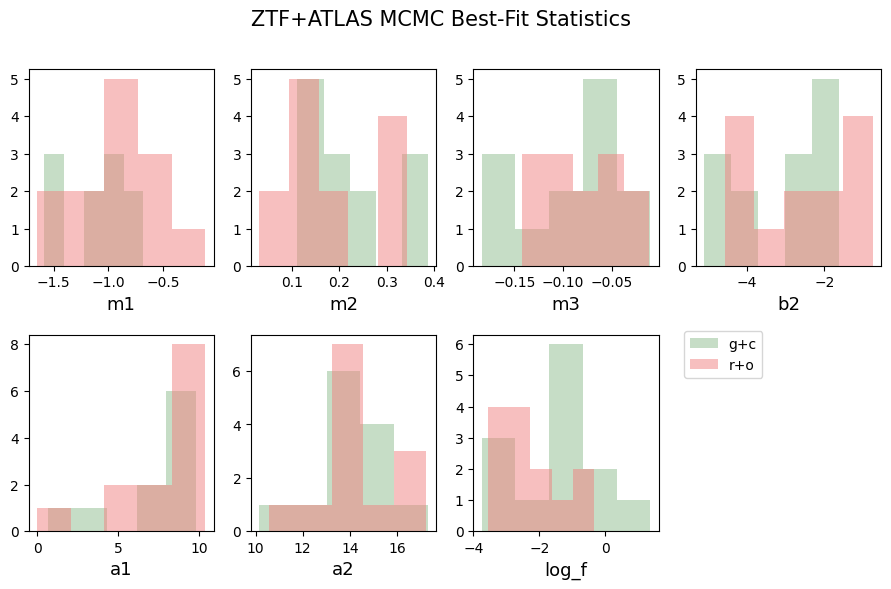

In [91]:
fig,axs = plt.subplots(2,4,figsize=(11,6))
a=0.5

axs[0,0].hist(bestfit_df['m1_g'][bestfit_df['m1_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[0,0].hist(bestfit_df['m1_r'][bestfit_df['m1_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[0,1].hist(bestfit_df['m2_g'][bestfit_df['m2_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[0,1].hist(bestfit_df['m2_r'][bestfit_df['m2_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[0,2].hist(bestfit_df['m3_g'][bestfit_df['m3_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[0,2].hist(bestfit_df['m3_r'][bestfit_df['m3_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[0,3].hist(bestfit_df['b2_g'][bestfit_df['b2_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[0,3].hist(bestfit_df['b2_r'][bestfit_df['b2_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[1,0].hist(bestfit_df['a1_g'][bestfit_df['a1_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[1,0].hist(bestfit_df['a1_r'][bestfit_df['a1_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[1,1].hist(bestfit_df['a2_g'][bestfit_df['a2_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[1,1].hist(bestfit_df['a2_r'][bestfit_df['a2_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[1,2].hist(bestfit_df['log_f_g'][bestfit_df['log_f_g'].notna()],bins=5,histtype='stepfilled',color=['darkseagreen'],label=['g+c'],linewidth=2,alpha=a)
axs[1,2].hist(bestfit_df['log_f_r'][bestfit_df['log_f_r'].notna()],bins=5,histtype='stepfilled',color=['lightcoral'],label=['r+o'],linewidth=2,linestyle='dashed',alpha=a)

axs[1,3].axis("off")

axs[0,0].set_xlabel(xlabels[0],fontsize=13)
axs[0,1].set_xlabel(xlabels[1],fontsize=13)
axs[0,2].set_xlabel(xlabels[2],fontsize=13)
axs[0,3].set_xlabel(xlabels[3],fontsize=13)
axs[1,0].set_xlabel(xlabels[4],fontsize=13)
axs[1,1].set_xlabel(xlabels[5],fontsize=13)
axs[1,2].set_xlabel(xlabels[6],fontsize=13)

fig.subplots_adjust(hspace=0.35,wspace=0.2)
fig.suptitle('ZTF+ATLAS MCMC Best-Fit Statistics',fontsize=15)
handles, labels = axs[1,2].get_legend_handles_labels()
axs[1,2].legend(handles, labels, loc='center left', bbox_to_anchor=(1.1, 0.9))
plt.savefig(SAVE_DIR+'figures/hist_params_april23.png')

In [92]:
# MCMC FIT STATS
# best fit goes in order of: m1,m2,m3,b2,a1,a2,logf
def comp_stats(values,val=''):
    minv = min(values)
    p25 = np.percentile(values, 25)
    p50 = np.percentile(values, 50)
    mean = np.mean(values)
    p75 = np.percentile(values, 75)
    maxv = max(values)
    std = np.std(values)
    # print('\033[1m'+val+': min,  25%,  med,  mean,  75%,  max,  std \033[0m \n', 
    #       round(minv,3),round(p25,3),round(p50,3),round(mean,3),round(p75,3),round(maxv,3,),round(std,3))#,'\n')
    return np.array([minv,p25,p50,mean,p75,maxv,std])

#computing the stats
stats_g, stats_r, stats_other = [],[],[]
for i in range(len(bestfit_df.columns[1:])):
    col = bestfit_df.columns[1:][i]
    if col[-2:] == '_g':
        g = comp_stats(bestfit_df[col],val=col)
        stats_g.append(g)
    elif col[-2:] == '_r':
        r = comp_stats(bestfit_df[col],val=col)
        stats_r.append(r)
    else: 
        o = comp_stats(bestfit_df[col],val=col)
        stats_other.append(o)
    
#saving to df 
stats_col = ['min','p25','med','mean','p75','max','std']
stats_df = pd.DataFrame(columns=stats_col, data=stats_g)
stats_df_r = pd.DataFrame(columns=stats_col, data=stats_r)
stats_df_other = pd.DataFrame(columns=stats_col, data=stats_other)
stats_df = pd.concat([stats_df,stats_df_r],ignore_index=True)
stats_df= pd.concat([stats_df,stats_df_other],ignore_index=True)
stats_df.insert(0, 'param', ['m1', 'm2', 'm3', 'b2', 'a1', 'a2', 'log_f']*2 + list(bestfit_df.columns[15:]))
stats_df['filter'] = ['g']*len(stats_g) + ['r']*len(stats_r) + ['both']*len(bestfit_df.columns[15:])
stats_df.to_csv(SAVE_DIR+'/mcmc_bestfit_stats_april23.csv')
stats_df

,param,min,p25,med,mean,p75,max,std,filter
0,m1,-1.589472,NaN,NaN,-1.125995,NaN,-0.679592,0.285733,g
1,m2,0.111643,0.162317,0.206177,0.226054,0.268554,0.387251,0.084826,g
2,m3,-0.183369,-0.140359,-0.073015,-0.089994,-0.052926,-0.010197,0.051537,g
3,b2,-5.105449,-3.904050,-2.579680,-3.012784,-1.933101,-1.627364,1.225814,g
4,a1,0.642476,NaN,NaN,7.179418,NaN,9.798067,2.952679,g
5,a2,10.158979,13.527217,14.062884,13.996867,14.717309,17.318488,1.558663,g
6,log_f,-3.746322,-2.701529,-1.598560,-1.481048,-0.746472,1.364686,1.327698,g
7,m1,-1.653940,-1.115765,-0.861929,-0.887011,-0.552538,-0.111676,0.426369,r
8,m2,0.031369,0.115683,0.137601,0.177092,0.282817,0.343726,0.094522,r
9,m3,-0.141956,-0.111153,-0.084070,-0.082432,-0.059142,-0.011279,0.039642,r


/var/folders/ql/0nrbq6jj6ks_2gbxfdznzzlc0000gp/T/ipykernel_21346/1546565096.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_a1_g = float(stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean'])
/var/folders/ql/0nrbq6jj6ks_2gbxfdznzzlc0000gp/T/ipykernel_21346/1546565096.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_a2_g = float(stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean'])


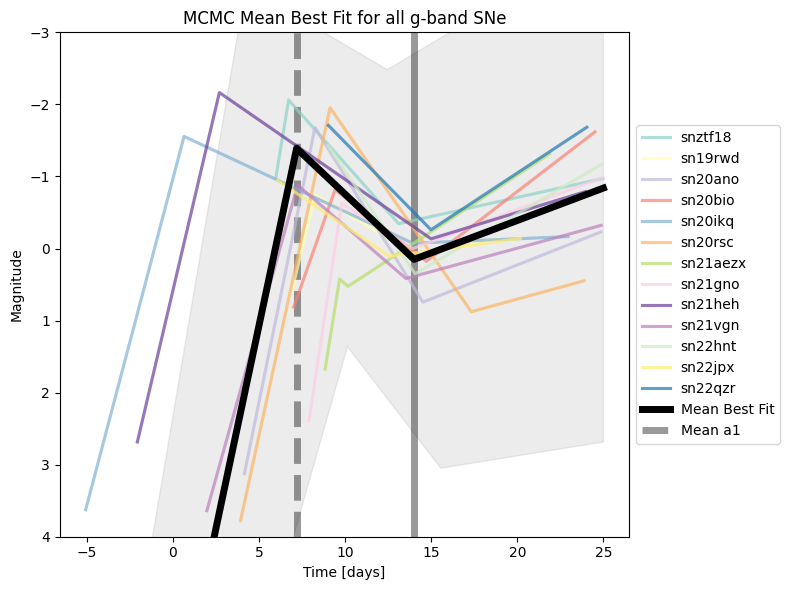

In [95]:
# PLOTTING THE MEAN FIT OVER THE BESTFITS
mean_x = np.arange(-3,25,0.001)

a1s,a2s = [],[]
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    g_df = df[(df['filter']=='ZTF_g') | (df['filter']=='c')]
    x_plt = np.arange(min(g_df['norm_t']),max(g_df['norm_t']),0.01)

    best = np.array(all_fits_g[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_g[i]).T[0] - np.array(all_fits_g[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_g[i]).T[0] + np.array(all_fits_g[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_g_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=0.7, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='gray', alpha=0.05)
    
    # #plotting ztf/atlas data
    x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
    # plt.errorbar(x, y, yerr, linestyle='', marker='.', color='black', alpha=0.04, label='data', markersize=15) #ztf errors

#overall mean best fit
mean_fit_g = stats_df[stats_df['filter']=='g']['mean']
lower_mean =  np.array([model(stats_df[stats_df['filter']=='g']['mean']-stats_df[stats_df['filter']=='g']['std'],v,r1=True) for v in mean_x])
upper_mean =  np.array([model(stats_df[stats_df['filter']=='g']['mean']+stats_df[stats_df['filter']=='g']['std'],v,r1=True) for v in mean_x])
plt.plot(mean_x, np.array([model(mean_fit_g, v, r1=True) for v in mean_x]),c='black', label='Mean Best Fit', alpha=1.0, linewidth=5.0)
plt.fill_between(mean_x, lower_mean, upper_mean, color='gray', alpha=0.15)

mean_a1_g = float(stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean'])
# lower_a1_g, upper_a1_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std']
mean_a2_g = float(stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean'])
# lower_a2_g, upper_a2_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std']
# plt.axvspan(min_a1, max_a1, alpha=0.03, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
# plt.axvspan(min_a2, max_a2, alpha=0.03, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(mean_a1_g,alpha=0.4, color='black', linestyle='dashed', linewidth=5, label='Mean a1', zorder=1)
plt.axvline(mean_a2_g,alpha=0.4, color='black', linestyle='solid', linewidth=5, label='Mean a2', zorder=1)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Mean Best Fit for all g-band SNe')
plt.ylim(4,-3)
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/mean_mcmc_fits_g_april23.png')

4.981712899636477 24.91171289963605
6.840046300087124 24.180046300086754
2.1030208002775908 24.12302080027712
8.931084000039846 24.951084000039504
-6.880193000193685 22.87980699980568
3.0798104000277817 24.989810400027316
8.920277799945325 23.040277799945024
7.959467599634081 24.049467599633736
4.12297789985314 24.052977899852714
3.0539090000092983 24.94390900000883
5.956030100118369 24.996030100117963
1.9527329998090863 24.642732999809105
6.87473600031808 22.164736000317752


/var/folders/ql/0nrbq6jj6ks_2gbxfdznzzlc0000gp/T/ipykernel_21346/830885127.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_a1_r = float(stats_df[stats_df['filter']=='r'].loc[stats_df['param']=='a1']['mean'])
/var/folders/ql/0nrbq6jj6ks_2gbxfdznzzlc0000gp/T/ipykernel_21346/830885127.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_a2_r = float(stats_df[stats_df['filter']=='r'].loc[stats_df['param']=='a2']['mean'])


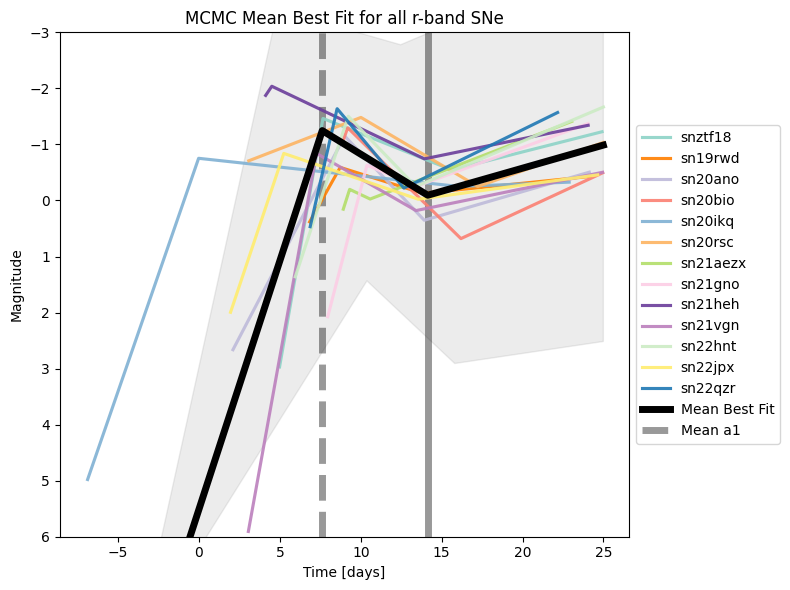

In [112]:
mean_x = np.arange(-7,25,0.01)

a1s,a2s = [],[]
plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    r_df = df[(df['filter']=='ZTF_r') | (df['filter']=='o')]
    x_plt = np.arange(min(r_df['norm_t']),max(r_df['norm_t']),0.01)
    print(min(x_plt),max(x_plt))

    best = np.array(all_fits_r[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_r[i]).T[0] - np.array(all_fits_r[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_r[i]).T[0] + np.array(all_fits_r[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_r_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=0.9, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='lightgray', alpha=0.2)

    #plotting ztf data
    x,y,yerr = np.array(r_df['norm_t']),np.array(r_df['norm_m']),np.array(r_df['mag_err_all'])
    # plt.errorbar(x, y, yerr, linestyle='', marker='.', color='gray', alpha=0.05, label='data', markersize=15) #ztf errors, 

#overall mean best fit
mean_fit_r = stats_df[stats_df['filter']=='r']['mean']
lower_mean =  np.array([model(stats_df[stats_df['filter']=='r']['mean']-stats_df[stats_df['filter']=='r']['std'],v,r1=True) for v in mean_x])
upper_mean =  np.array([model(stats_df[stats_df['filter']=='r']['mean']+stats_df[stats_df['filter']=='r']['std'],v,r1=True) for v in mean_x])
plt.plot(mean_x, np.array([model(mean_fit_r, v, r1=True) for v in mean_x]),c='black', label='Mean Best Fit', alpha=1.0, linewidth=5.0)
plt.fill_between(mean_x, lower_mean, upper_mean, color='gray', alpha=0.15)

mean_a1_r = float(stats_df[stats_df['filter']=='r'].loc[stats_df['param']=='a1']['mean'])
# lower_a1_g, upper_a1_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std']
mean_a2_r = float(stats_df[stats_df['filter']=='r'].loc[stats_df['param']=='a2']['mean'])
# lower_a2_g, upper_a2_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std']
# plt.axvspan(min_a1, max_a1, alpha=0.03, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
# plt.axvspan(min_a2, max_a2, alpha=0.03, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(mean_a1_r,alpha=0.4, color='black', linestyle='dashed', linewidth=5, label='Mean a1', zorder=1)
plt.axvline(mean_a2_r,alpha=0.4, color='black', linestyle='solid', linewidth=5, label='Mean a2', zorder=1)

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Mean Best Fit for all r-band SNe')
plt.ylim(6,-3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/mean_mcmc_fits_r_april23.png')

In [109]:
def compare_bestfits(fp_mean, fp_std, alert_mean, alert_std, param_name='str', band='str'):
    fig, ax = plt.subplots(1,1, figsize=(2,4)) 
    if band=='g':
        colors=['seagreen', 'mediumseagreen', 'palegreen']
    if band=='r':
        colors=['lightcoral', 'orange', 'gold']
    ax.scatter(1, fp_mean, color='black', marker='o',zorder=4, s=75)
    ax.vlines(1, ymin=fp_mean-fp_std, ymax=fp_mean+fp_std, color=colors[0], linewidth=6, zorder=2, label='1sigma')
    ax.vlines(1, ymin=fp_mean-(2*fp_std), ymax=fp_mean+(2*fp_std), color=colors[1], linewidth=6, zorder=1, label='2sigma')
    ax.vlines(1, ymin=fp_mean-(3*fp_std), ymax=fp_mean+(3*fp_std), color=colors[2], linewidth=6, zorder=0, label='3sigma')

    ax.scatter(2, alert_mean, color='black', marker='o',zorder=4, s=75)
    ax.vlines(2, ymin=alert_mean-alert_std, ymax=alert_mean+alert_std, color=colors[0], linewidth=6, zorder=2)
    ax.vlines(2, ymin=alert_mean-(2*alert_std), ymax=alert_mean+(2*alert_std), color=colors[1], linewidth=6, zorder=1)
    ax.vlines(2, ymin=alert_mean-(3*alert_std), ymax=alert_mean+(3*alert_std), color=colors[2], linewidth=6, zorder=0)

    ax.set_xlim(0.25,2.75)
    x_ticks_labels = ['FP+Alert', 'Alert']
    ax.set_xticks([1,2])
    ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=11)
    ax.set_ylabel(param_name, fontsize=13)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(band+'-band MCMC comparisons for '+param_name)
    return

In [98]:
# compare_bestfits(-1.154, 0.330, -0.721, 0.125, param_name='m1', band='g')
# compare_bestfits(0.209, 0.0611, 0.195, 0.0756, param_name='m2', band='g')
# compare_bestfits(-0.100, 0.0515, -0.100, 0.0630, param_name='m3', band='g')

In [97]:
# compare_bestfits(-1.003, 0.390, -0.686, 0.115, param_name='m1', band='r')
# compare_bestfits(0.179, 0.0884, 0.205, 0.104, param_name='m2', band='r')
# compare_bestfits(-0.0875, 0.0384, -0.0830, 0.0393,  param_name='m3', band='r')